### Simple Linear Regression

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read The Data Sets 

In [4]:
import pandas as pd
df = pd.read_csv('50_Startups (3).csv')
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Perfom basic data quality checks 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [7]:
df.duplicated().sum()

0

PROFIT VS RND 
PROFIT_pred = B0 + B1xRND

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns 

<function matplotlib.pyplot.show(close=None, block=None)>

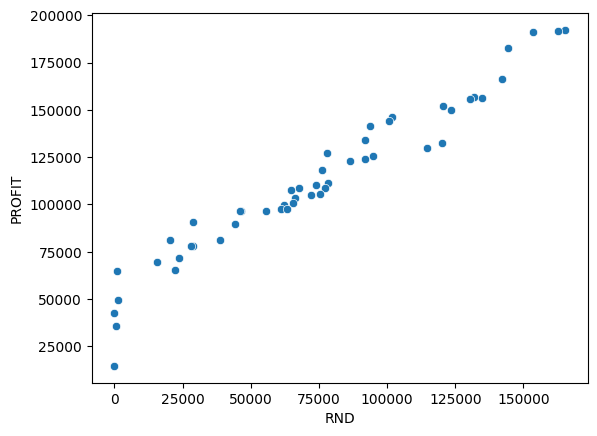

In [9]:
sns.scatterplot(data=df, x='RND', y='PROFIT')
plt.show

Seprate X and Y 

In [11]:
X = df[['RND']]
Y = df[['PROFIT']]

In [12]:
X.head

<bound method NDFrame.head of           RND
0   165349.20
1   162597.70
2   153441.51
3   144372.41
4   142107.34
5   131876.90
6   134615.46
7   130298.13
8   120542.52
9   123334.88
10  101913.08
11  100671.96
12   93863.75
13   91992.39
14  119943.24
15  114523.61
16   78013.11
17   94657.16
18   91749.16
19   86419.70
20   76253.86
21   78389.47
22   73994.56
23   67532.53
24   77044.01
25   64664.71
26   75328.87
27   72107.60
28   66051.52
29   65605.48
30   61994.48
31   61136.38
32   63408.86
33   55493.95
34   46426.07
35   46014.02
36   28663.76
37   44069.95
38   20229.59
39   38558.51
40   28754.33
41   27892.92
42   23640.93
43   15505.73
44   22177.74
45    1000.23
46    1315.46
47       0.00
48     542.05
49       0.00>

In [13]:
Y.head

<bound method NDFrame.head of        PROFIT
0   192261.83
1   191792.06
2   191050.39
3   182901.99
4   166187.94
5   156991.12
6   156122.51
7   155752.60
8   152211.77
9   149759.96
10  146121.95
11  144259.40
12  141585.52
13  134307.35
14  132602.65
15  129917.04
16  126992.93
17  125370.37
18  124266.90
19  122776.86
20  118474.03
21  111313.02
22  110352.25
23  108733.99
24  108552.04
25  107404.34
26  105733.54
27  105008.31
28  103282.38
29  101004.64
30   99937.59
31   97483.56
32   97427.84
33   96778.92
34   96712.80
35   96479.51
36   90708.19
37   89949.14
38   81229.06
39   81005.76
40   78239.91
41   77798.83
42   71498.49
43   69758.98
44   65200.33
45   64926.08
46   49490.75
47   42559.73
48   35673.41
49   14681.40>

## Creatin a Linear Regression Model 

In [14]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X,Y)

LinearRegression()

##LinearRegression()
In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

## Check intercept and Coefficent 

In [15]:
model.intercept_

array([49032.89914125])

In [16]:
model.coef_

array([[0.85429137]])

## PROFIT_pred = 49032.8991 + 0.8542xRND

1. If RND budget is 0 then PROFIT estimated is 49032.8991
2. If RND budget increases by 1000 the profit increases by 854.3

## Visualise the line fit 

[]

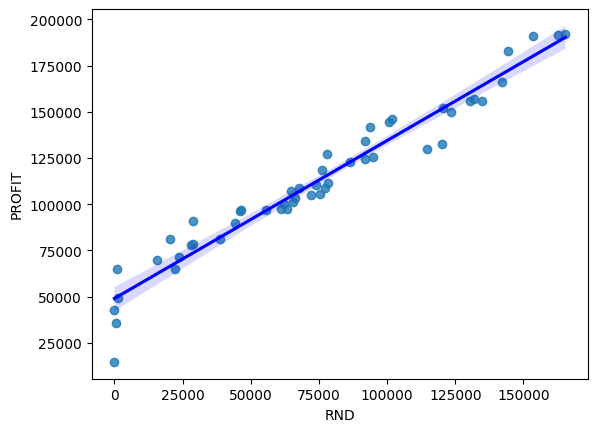

In [23]:
sns.regplot(data = df, x='RND', y='PROFIT', line_kws={'color':'Blue'})
plt.plot()

## Estimating profit for out of sample data 

In [24]:
X.values

array([[165349.2 ],
       [162597.7 ],
       [153441.51],
       [144372.41],
       [142107.34],
       [131876.9 ],
       [134615.46],
       [130298.13],
       [120542.52],
       [123334.88],
       [101913.08],
       [100671.96],
       [ 93863.75],
       [ 91992.39],
       [119943.24],
       [114523.61],
       [ 78013.11],
       [ 94657.16],
       [ 91749.16],
       [ 86419.7 ],
       [ 76253.86],
       [ 78389.47],
       [ 73994.56],
       [ 67532.53],
       [ 77044.01],
       [ 64664.71],
       [ 75328.87],
       [ 72107.6 ],
       [ 66051.52],
       [ 65605.48],
       [ 61994.48],
       [ 61136.38],
       [ 63408.86],
       [ 55493.95],
       [ 46426.07],
       [ 46014.02],
       [ 28663.76],
       [ 44069.95],
       [ 20229.59],
       [ 38558.51],
       [ 28754.33],
       [ 27892.92],
       [ 23640.93],
       [ 15505.73],
       [ 22177.74],
       [  1000.23],
       [  1315.46],
       [     0.  ],
       [   542.05],
       [     0.  ]])

In [25]:
rnd = [[80000]]
profit_pred =model.predict(rnd)
profit_pred

array([[117376.20881636]])

### Evaluating the model
1. Mean Squared Error
2. Root Mean Squared Error
3. Mean Absolute Error
4. Mean Absolute Percentage Error
5. R2 Score

In [26]:
# R2 score
model.score(X,Y)

0.9465353160804393

In [28]:
# predict te results for training data
ypred = model.predict(X)
ypred[0:5]

array([[190289.29389289],
       [187938.71118575],
       [180116.65707807],
       [172369.00320589],
       [170433.97345032]])

In [29]:
Y.head

<bound method NDFrame.head of        PROFIT
0   192261.83
1   191792.06
2   191050.39
3   182901.99
4   166187.94
5   156991.12
6   156122.51
7   155752.60
8   152211.77
9   149759.96
10  146121.95
11  144259.40
12  141585.52
13  134307.35
14  132602.65
15  129917.04
16  126992.93
17  125370.37
18  124266.90
19  122776.86
20  118474.03
21  111313.02
22  110352.25
23  108733.99
24  108552.04
25  107404.34
26  105733.54
27  105008.31
28  103282.38
29  101004.64
30   99937.59
31   97483.56
32   97427.84
33   96778.92
34   96712.80
35   96479.51
36   90708.19
37   89949.14
38   81229.06
39   81005.76
40   78239.91
41   77798.83
42   71498.49
43   69758.98
44   65200.33
45   64926.08
46   49490.75
47   42559.73
48   35673.41
49   14681.40>

In [30]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y, ypred)
mse

85120931.32706906

In [31]:
rmse = mse**(1/2)
rmse 

9226.100548285232

In [32]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y, ypred)
mae

6910.98435457961

In [33]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(Y, ypred)
mape

0.11070141081984847

In [37]:
from sklearn.metrics import r2_score
r2 = r2_score(Y, ypred)
r2

0.9465353160804393

PROFIT AND RND HAVE STRONG LINEAR RELATIONSHIP,

Reliablity of fit is 94.65%
Hence this is a good model 